# 1. BAR PLOT

Bar biasa dipakai untuk:
- menampilkan revenue
- membandingkan series untuk beberapa variabel

saat EDA, barplot itu harus hati2 terlebih pake frekuensi (better pake rasio)


In [1]:
#Bar plot di seaborn yg menampilkan jumlah yaitu countplot

# 2. PIE CHART

- Pie chart hanya satu rentang waktu, tidak bisa timeseries kalau untuk beberapa kategori
- Biasa ditampilkan dari proporsi/rasionya
- kalo mau bikin beda rentang waktu, ya dibikin beberapa pie chat

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import data
df = pd.read_csv('StudentsPerformance.csv')

#menampilkan data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#mengecek data numerikal apa aja, kolomnya cocok gak.
#kalo ada yg gak cocok, berarti ada yg perlu diubah

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
##mengecek info
#mengecek jumlah entriess==jumlah null
#cek dtype sesuai, kalo string biasanya object

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
#memanggil kolom berdasarkan dtype, ini berdasarkan objeck

# df.select_dtypes(include='object')

In [7]:
#mengecek proporsi data dari sebuah kolom

df['gender'].value_counts(normalize=True)

female    0.518
male      0.482
Name: gender, dtype: float64

In [8]:
df['race/ethnicity'].value_counts(normalize=True)

group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: race/ethnicity, dtype: float64

In [9]:
df['parental level of education'].value_counts(normalize=True)

some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: parental level of education, dtype: float64

In [10]:
df['test preparation course'].value_counts(normalize=True)

none         0.642
completed    0.358
Name: test preparation course, dtype: float64

In [11]:
#untuk memudahkan kita melihat dan menarik kesimpulan,
#jadi kita buat summary
#bisa membuat data frame

def summary(df):
    #bikin dulu list kosong
    dtype = []
    unique = []
    ratio = []
    
    #looping per column
    for i in df.columns:
        dtype.append(df[i].dtype)
        val_count = df[i].value_counts(normalize = True)
        unique.append(list(val_count.index))
        ratio.append(val_count.values)
        
    #masukin jadi dataframe
    summary_df = pd.DataFrame({'dtype': dtype, 'unique':unique, 'ratio':ratio}, index = df.columns)
    
    return display(summary_df)


In [12]:
summary(df)

,dtype,unique,ratio
gender,object,"[female, male]","[0.518, 0.482]"
race/ethnicity,object,"[group C, group D, group B, group E, group A]","[0.319, 0.262, 0.19, 0.14, 0.089]"
parental level of education,object,"[some college, associate's degree, high school...","[0.226, 0.222, 0.196, 0.179, 0.118, 0.059]"
lunch,object,"[standard, free/reduced]","[0.645, 0.355]"
test preparation course,object,"[none, completed]","[0.642, 0.358]"
math score,int64,"[65, 62, 59, 69, 73, 61, 67, 63, 68, 71, 58, 7...","[0.036, 0.035, 0.032, 0.032, 0.027, 0.027, 0.0..."
reading score,int64,"[72, 74, 64, 73, 67, 58, 66, 78, 75, 84, 70, 8...","[0.034, 0.033, 0.032, 0.03, 0.03, 0.028, 0.027..."
writing score,int64,"[74, 70, 68, 73, 62, 80, 72, 54, 76, 78, 67, 6...","[0.035, 0.033, 0.031, 0.028, 0.027, 0.027, 0.0..."


In [13]:
## menyiapkan data untuk barplot

df_by_gender = df.groupby('gender').mean()
df_by_gender

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


# __1. BAR PLOT__ 

### 1.1 Barplot (matplotlib)

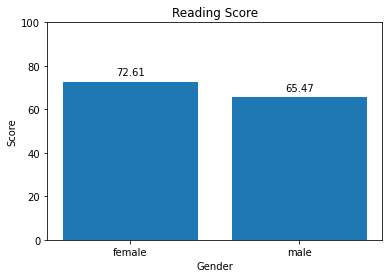

In [14]:
## membuat barplot

            #x      , y
plt.bar(df_by_gender.index, df_by_gender['reading score'])
plt.xlabel('Gender')
plt.ylabel('Score')
plt.title('Reading Score')
plt.ylim(0,100)  #mengeset sumbu y   

plt.annotate(f'{round(df_by_gender.iloc[0, 1], 2)}',
             xy=('female', df_by_gender.loc['female', 'reading score']+3), ha='center')
plt.annotate(f'{round(df_by_gender.iloc[1, 1], 2)}',
             xy=('male', df_by_gender.loc['male', 'reading score']+3), ha='center')


plt.show()

### 1.2 Barhplot (matplotlib)

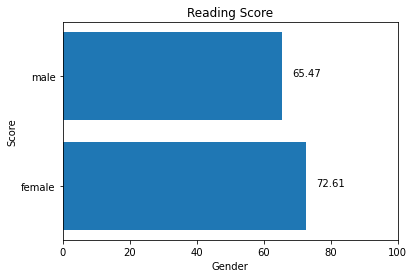

In [15]:
#membuat horizontal bar

            #x      , y
plt.barh(df_by_gender.index, df_by_gender['reading score'])
plt.xlabel('Gender')
plt.ylabel('Score')
plt.title('Reading Score')
plt.xlim(0,100)  #mengeset sumbu x   


plt.annotate(f'{round(df_by_gender.iloc[0, 1], 2)}',
             xy=(df_by_gender.loc['female', 'reading score']+3, 'female'))
plt.annotate(f'{round(df_by_gender.iloc[1, 1], 2)}',
             xy=(df_by_gender.loc['male', 'reading score']+3, 'male'))

plt.show()

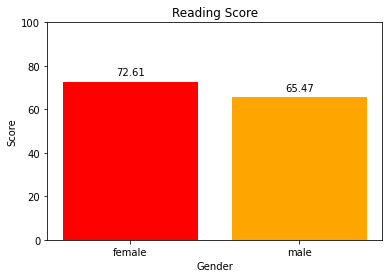

In [16]:
plt.bar(df_by_gender.index, df_by_gender['reading score'], color=['red', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Score')
plt.title('Reading Score')
plt.ylim(0, 100)
plt.annotate(f'{round(df_by_gender.iloc[0, 1], 2)}',
             xy=('female', df_by_gender.loc['female', 'reading score']+3), ha='center')
plt.annotate(f'{round(df_by_gender.iloc[1, 1], 2)}',
             xy=('male', df_by_gender.loc['male', 'reading score']+3), ha='center')
plt.show()

### 1.3 Barplot (Seaborn)

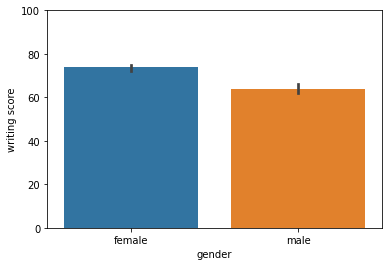

In [17]:
#membuat barplot dengan seaborn

#barplot diseaborn, default pake mean datanya dan bisa disetting mau pake setimator apa
#label juga sudah otomatis

#ci apa sih wkwk

sns.barplot(x = 'gender', y='writing score', data = df, estimator = np.median)
plt.ylim(0,100)

plt.show()

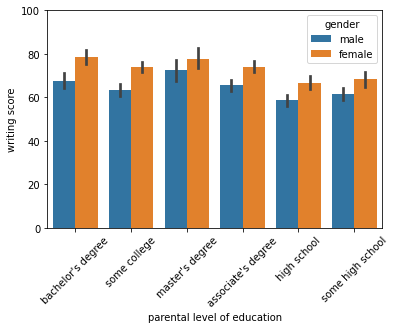

In [18]:
##kalo mau membuat rata2 nilai writinng score siswa berdasarkan suatu kolom tertentu

sns.barplot(x = 'parental level of education', y = 'writing score', 
            hue ='gender', data = df, hue_order = ['male', 'female'])
plt.ylim(0,100)

#karen kurang jelas label xnya bisa diubah rotation
plt.xticks(rotation = 45)

plt.show()

# __2. COUNT PLOT__ 

### Countplot (Seaborn)

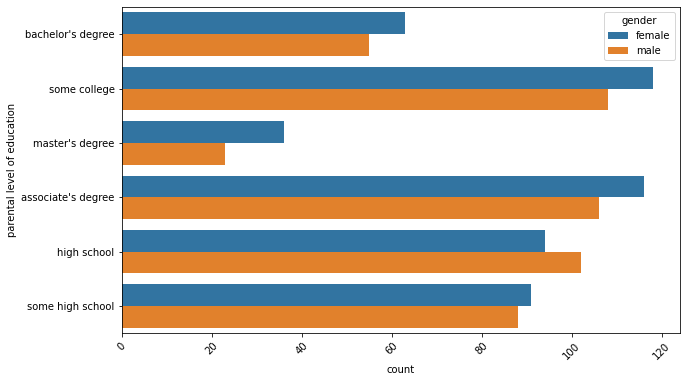

In [19]:
##membuat countplot (yaitu bikin chart berdasarkan frekuensi)
#untuk countplot x dan y gabisa diisi berbarengan, kalo:
#kalo y yg diisi maka jadi horizontal countplot
#kalo x yg diisi maka jadi vertikal countplot

plt.figure(figsize=(10,6))
sns.countplot(y='parental level of education', hue='gender', data=df)
plt.xticks(rotation=45)
plt.show()

In [20]:
by_parental = df.groupby('parental level of education')

by_parental['gender'].value_counts(normalize = True).unstack(level=1)

#unstack(level=1) ==> untuk memudahkan melihat dan level itu index berapa yg akan dijadikan kolom

gender,female,male
parental level of education,,
associate's degree,0.522523,0.477477
bachelor's degree,0.533898,0.466102
high school,0.479592,0.520408
master's degree,0.610169,0.389831
some college,0.522124,0.477876
some high school,0.508380,0.491620


# __SEABORN - FACETGRID__

## 1. Bar Plot

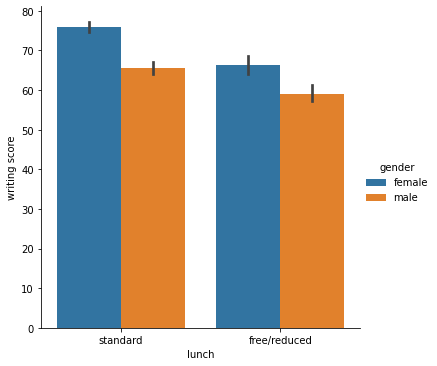

In [21]:
sns.catplot(x='lunch', y = 'writing score', hue='gender',
           data=df, kind='bar')

plt.show()

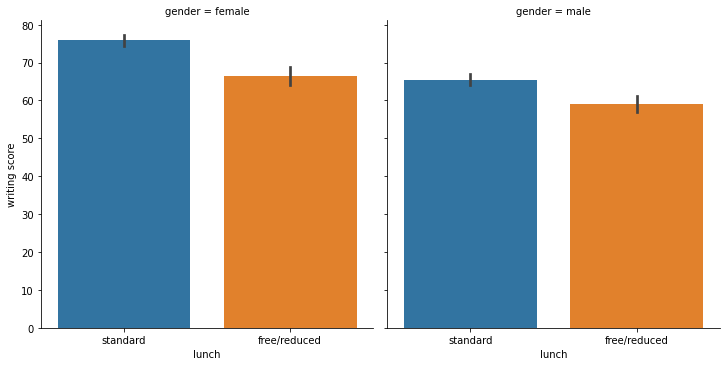

In [22]:
#membuat perbanding gender dan memecah menjadi subplot kolom

sns.catplot(x='lunch', y = 'writing score', col='gender',
           data=df, kind='bar')

plt.show()

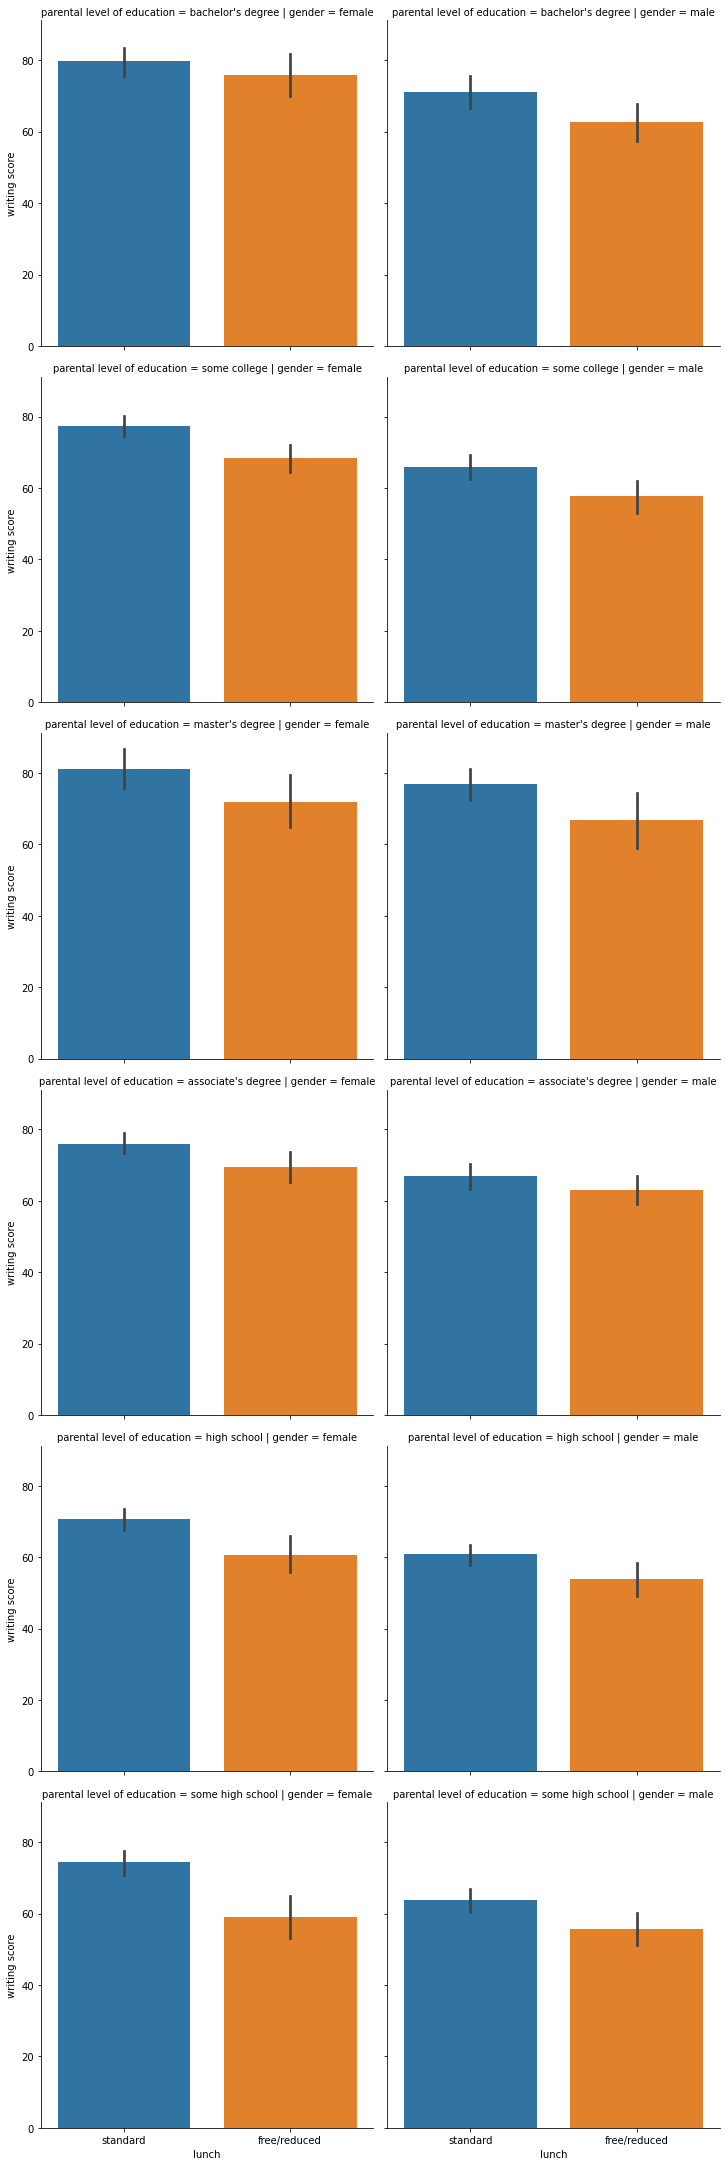

In [23]:
#membuat perbanding gender dipecah menjadi subplot kolom,
# dan perbanding per level education per subplot row)

sns.catplot(x='lunch', y = 'writing score', col='gender',
           row = 'parental level of education',
            data=df, kind='bar')

plt.show()

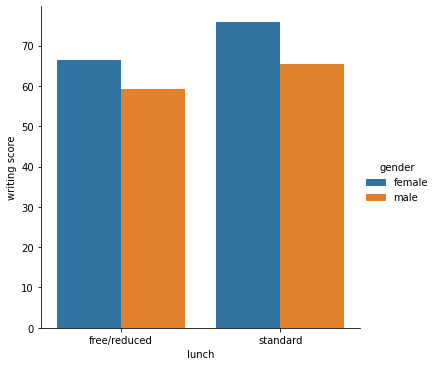

In [24]:
#membuat grafik sederhana dan ci dihapus

sns.catplot(x='lunch', y = 'writing score', hue='gender',
            data=df, kind='bar', order = ['free/reduced', 'standard'], ci = None)

plt.show()

## 2. count plot

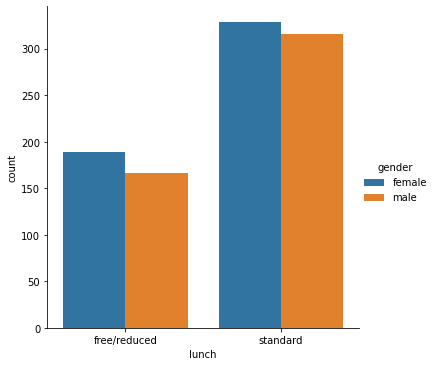

In [25]:
#untuk kind count, salah satu datanya harus kosong alias bukan numerical

sns.catplot(x='lunch', hue='gender',
            data=df, kind='count', order = ['free/reduced', 'standard'], ci = None)

plt.show()

## 3. Point Plot

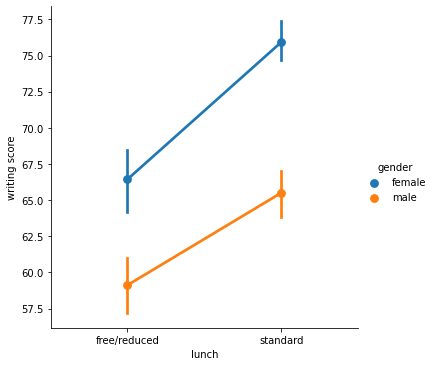

In [26]:
# point plot, membedakan antar kategorikal

sns.catplot(x='lunch', y='writing score', hue='gender',
           data=df, kind='point', order=['free/reduced', 'standard'])
plt.show()

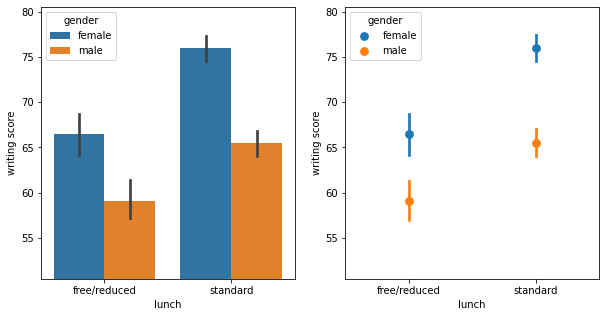

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(121)
g = sns.barplot(x='lunch', y='writing score', hue='gender',
           data=df, order=['free/reduced', 'standard'])
g.set_ylim(50.5, 80.5)

plt.subplot(122)
f = sns.pointplot(x='lunch', y='writing score', hue='gender',
           data=df, order=['free/reduced', 'standard'], join=False)
f.set_ylim(50.5, 80.5)

plt.show()

# __PIE CHART__

Tipe-tipe pie chart:
- nested piechart
- 
-
-

In [28]:
# di seaborn gaada pie chart

In [29]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [30]:
#menggrup berdasarkan ras

by_race = df.groupby('race/ethnicity').mean()
by_race

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [31]:
#1. buat dulu labelnya kalo buat pie chart

race_label = list(by_race.index)
race_label

['group A', 'group B', 'group C', 'group D', 'group E']

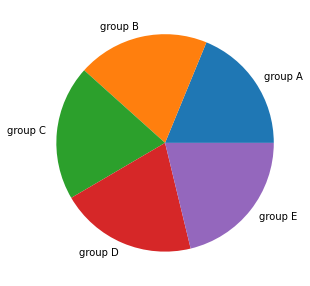

In [32]:
#2. buat pie-chartnya

plt.figure(figsize=(10,5))
plt.pie(by_race['reading score'], labels = race_label)

plt.show()

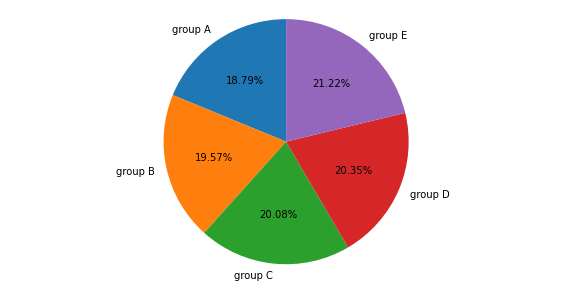

In [35]:
#2. buat pie-chartnya + dapet persentasenya
#pake auto pct
#f itu berapa angka dibelakang koma
#%% itu format untuk menambah %


plt.figure(figsize=(10,5))
plt.pie(by_race['reading score'], labels = race_label,
       autopct='%.2f%%',
       startangle = 90) #biar lebih simetris

plt.axis('equal') #piechart posisinya ditengah

plt.show()

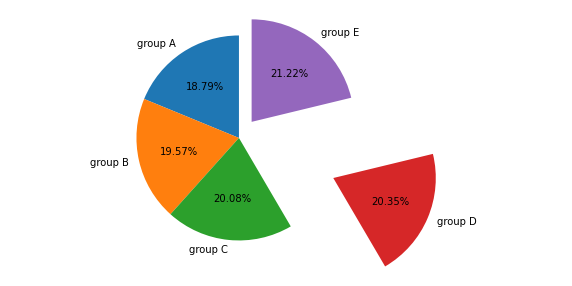

In [34]:
#3. buat pie-chartnya + dapet persentasenya
#pake auto pct
#f itu berapa angka dibelakang koma
#%% itu format untuk menambah %
#explode = untuk menonjolkan data sesuai yg kita inginkan

#explodelist itu berdasarkan index, angkanya itu inch atau cm gt 
explode_list = [0,0,0,1,0.2]

plt.figure(figsize=(10,5))
plt.pie(by_race['reading score'], labels = race_label,
       autopct='%.2f%%', explode = explode_list,
       startangle = 90) #biar lebih simetris

plt.axis('equal') #piechart posisinya ditengah

plt.show()